In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import lib.dataset as dataset
import lib.network as network
import lib.path as path
import lib.utils as  utils
from collections import deque
from tensorflow.python.tools import inspect_checkpoint

In [2]:
params=json.loads(open('params.json').read())["TRAIN_PARAMS"]

In [3]:
n=np.load("/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/aws/model_2018-03-15_18:04:43_L:0.001_E:10_B:16/epoch_5/train_loss.npy")

In [4]:
# get preprocessed data
data_all, label_all = dataset.get_preprocessed_dataset()

# split dataset
X_train, y_train, X_val, y_val, X_test, y_test = dataset.train_val_test_split(
    data_all, label_all)


np.save('X_test',X_test)
np.save('y_test',y_test)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


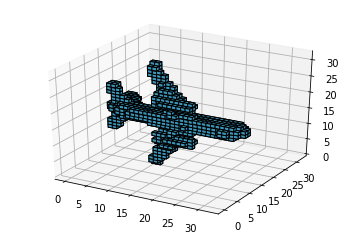

In [14]:
y=np.load(y_train[1])
im=utils.vis_voxel(y)

In [ ]:
net = network.Network()
X_test=np.load('X_test.npy')
y_test=np.load('y_test.npy')
x=dataset.from_npy(X_test)
y=dataset.from_npy(y_test)

In [ ]:
model_dir="/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/aws/model_2018-03-15_18:04:43_L:0.001_E:10_B:16/epoch_5"
net.restore(model_dir)
y_hat=net.predict(x)

In [ ]:
utils.vis_voxel(y_hat[0][0])

In [ ]:
for i in range(24):
    utils.vis_montage(x[0][i],2)